In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from raphtory import Graph
from raphtory import algorithms

g = Graph(1) # Number of shards

g.add_vertex(1, 11, {"type": "wallet", "balance": 99.5})
g.add_vertex(2, 12, {"type": "wallet", "balance": 10.0})
g.add_vertex(3, 13, {"type": "wallet", "balance": 76})

g.add_edge(4, 11, 12, {"prop1": 1, "prop2": 9.8, "prop3": "test"})
g.add_edge(5, 12, 13, {"prop1": 1321, "prop2": 9.8, "prop3": "test"})
g.add_edge(6, 13, 11, {"prop1": 645, "prop2": 9.8, "prop3": "test"})

view  = g.window(0,10)

print(g.has_vertex(13))
print(view.vertex(13).in_degree())
print(view.vertex(13).out_degree())
print(view.vertex(13).degree())



triangles  = algorithms.triangle_count(view,13) # How many triangles is 13 involved in
print(triangles)



True
1
1
2
1


<Axes: xlabel='degree', ylabel='Count'>

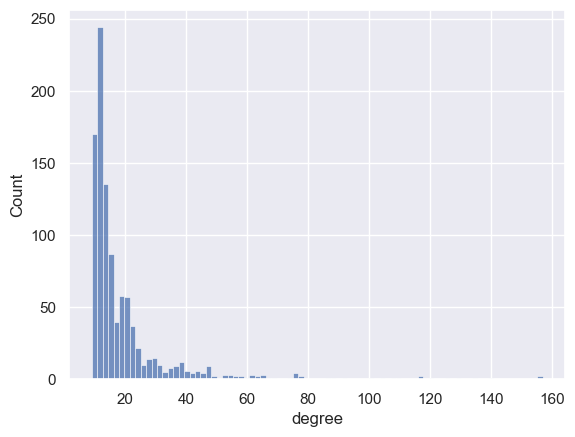

In [3]:
from raphtory import graph_gen

g = Graph(4)
graph_gen.ba_preferential_attachment(g,vertices_to_add=1000,edges_per_step=10)
view = g.window(0,1000)

ids = []
degrees = []
for v in view.vertices():
    ids.append(v.id)
    degrees.append(v.degree())

df = pd.DataFrame.from_dict({"id":ids,"degree": degrees})
#df = df.sort_values(by="degree",ascending=False)

sns.set()
sns.histplot(df.degree)
